In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Bisection Method

The bisection method is a root-finding method that applies to any continuous functions for which two output values with opposite signs are known. 

## Definition

Assume that $f(x)$ is continuous on a given interval $\left[a, b \right]$ and that is also satisfies

$$
f(a) \cdot f(b) < 0
$$

as to say that the result of $f(a)$ times $f(b)$ have to have opposite signs as to satisfy their multiplications to be negative. 

Using the [intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), the function $f(x)$ must have at least one root in $[a, b]$: in this case a root value k where  $a \le k \le b$ and $f(k) = 0$. This is why you must pick two numbers $a$ and $b$ with opposite signs $[-, +]$. 

---

## Function Example

$$
f(x) = \sin(x)\left(\frac{1}{1-x^2}\right)
$$

In [3]:
def f(x):
    return np.divide(1, 1 + np.power(x, 2)) * np.sin(x)

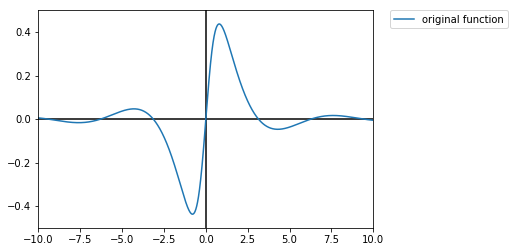

In [69]:
points = np.arange(-10, 10, .001)
plt.xlim(-10,10)
plt.ylim(-.5, .5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(points, f(points), label="original function")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

With the above graph, it becomes evident that a root exists between the following values:

* $[-7.5, -5.0]$
* $[-5.0, -2.5]$
* $[-2.5, 2.5]$
* $[2.5, 5.0]$
* $[5.0, 7.5]$

Which we can utilize to run our implementation of the bisection method below.

---
## Implementation

In [87]:
def bisect(f, a, b, e):
    """ Bisection Method

    inputs:
    f - a function.
    a - Starting interval
    b - Ending interval
    e - Acceptable value for 0; (e.g. consider 0.001 == 0)
    """

    while(True):
        c = (a + b)/2
        if b - c <= e:
            return c if abs(c) > e else 0
        elif f(b)*f(c) <= 0:
            a = c
        else:
            b = c

### 1. Finding Roots

The interval $[a, b]$ is halved in size for every pass through the algorithm. Because of line 17 through 19 on the code above, $[a, b]$ will always contain a root of $f(x)$. Since a root $\alpha$ is in the range of $[a, b]$, it must lie within either $[a, c]$ or $[c, b]$; and consequently

$$
| \ c - \alpha \ | \ge b - c = c - a
$$

This is justficiation for the test on line 14. On completion of the algortihm, $c$ will be an approximation to the root with 

$$
| \ c - \alpha \ | \le \epsilon
$$

In [91]:
r = [-7.5, -5.0, -2.5, 2.5, 5.0, 7.5]
roots = []
for i in range(len(r) - 1):
    root = bisect(f, r[i], r[i+1], 10**(-7))
    roots.append(root)
    print('f(0) = ', root)

f(0) =  -6.283185258507729
f(0) =  -3.1415926665067673
f(0) =  0
f(0) =  3.1415926665067673
f(0) =  6.283185258507729


### 2. Testing our Roots

In [94]:
for root in roots:
    print(f'f({root}) = ', f(root))

f(-6.283185258507729) =  1.2024150526688845e-09
f(-3.1415926665067673) =  1.188357318390102e-09
f(0) =  0.0
f(3.1415926665067673) =  -1.188357318390102e-09
f(6.283185258507729) =  -1.2024150526688845e-09


### 3. Analyzing our Results

You will notice that not all of the results perfectly equals to zero, but that is due to the value for $\epsilon$ that we had set in step number 1.

There, we set $\epsilon = 10^{-7}$, or in other words, we told our machine to accept any number below that value as equals to zero. 